# 5.1 재귀 알고리즘의 기본

## 재귀 알아보기

재귀(recursion)란?
<br> 어떤 이벤트에서 자기 자신을 포함하고 다시 자기 자신을 사용하여 정의되는 경우 (자기 자신을 호출하는 함수)


> 재귀적으로 표현한 자연수의 정의
* 1은 자연수이다. 
* 어떤 자연수의 바로 다음 수도 자연수이다.

재귀를 효과적으로 사용하면 프로그램을 간결하고 효율성 좋게 작성 가능하다.

## 팩토리얼 알아보기

팩토리얼(factorial) 문제는 재귀를 사용하는 대표적인 예이다.

> 팩토리얼 n!의 정의 (n : 양의 정수)
* 0! = 1
* n > 0 이면 n! = n x (n-1)!

In [ ]:
# 실습 5-1
# 양의 정수 n의 팩토리얼 구하기

def factorial(n: int) -> int:
    """양의 정수 n의 팩토리얼을 구하는 과정"""
    if n > 0:
        return n * factorial(n - 1)     # 여기서 재귀 사용
    else:
        return 1

if __name__ == '__main__':          # __name__ : 현재 모듈의 이름을 가지고 있는 내장 변수
                                    # https://hyoje420.tistory.com/45
    n = int(input('출력할 팩토리얼 값을 입력하세요.: '))
    if n < 0:
        print("음수에 대한 팩토리얼은 계산하지 않습니다.")
    else:
        print(f'{n}의 팩토리얼은 {factorial(n)}입니다.')

출력할 팩토리얼 값을 입력하세요.: 3
3의 팩토리얼은 6입니다.


raise ValueError를 정의하고 try, except문을 사용해서 입력값이 음수일 때의 예외 처리를 발생시켜보자.

In [ ]:
# 보충 수업 5-1
# 양의 정수인 팩토리얼 구하기(n이 음수면 ValueError 예외 처리 발생)

def factorial(n : int) -> int:
    """양의 정수 n의 팩토리얼값을 재귀적으로 구함(n이 음수면 ValueError 예외 처리 발생)"""
    if n > 0:
        return n * factorial(n - 1)
    elif n == 0:
        return 1
    else:
        raise ValueError

if __name__ == '__main__':
    n = int(input('출력할 팩토리얼 값을 입력하세요.: '))
    try:
        print(f'{n}의 팩토리얼은 {factorial(n)}입니다.')
    except ValueError:
        print(f'{n}의 팩토리얼은 구할 수 없습니다.')

출력할 팩토리얼 값을 입력하세요.: 3
3의 팩토리얼은 6입니다.


8파이썬에서는 팩토리얼값을 구하는 표준 라이브러리로 math 모듈에서 factorial() 함수를 제공한다.

In [ ]:
import math

n = int(input("입력값: "))
f = math.factorial(n)
print(f'{n}의 팩토리얼은 {f}입니다.')

입력값: 3
3의 팩토리얼은 6입니다.


factorial() 함수처럼 함수 안에서 다시 자신과 똑같은 함수를 호출하는 것을 **재귀 호출(recursive call)**이라고 한다.

직접 재귀(direct) vs 간접 재귀(indirect)
> 직접 재귀 : 자신과 똑같은 함수를 호출하는 방식
<br> 간접 재귀 : 다른 함수를 통해 자신과 똑같은 함수를 호출하는 방식

※ 팩토리얼 함수는 재귀 함수로 정의하지 않는것이 오히려 간단하고 효율적이다.
<br> 왜일까?
* 메모리를 많이 차지하며 성능이 반복문을 사용하는것보다 느리다.
* 함수 호출시에 함수의 매개변수, 지역변수, 리턴값, 함수 종료 후 돌아가는 위치를 스택 메모리에 저장하게 되는데, 재귀함수를 사용하게 되면 함수를 반복적으로 불러오게 되므로 스택 메모리가 커지고 스택 오버플로우가 발생할 수 있다.

## 유클리드 호제법 알아보기

두 정수의 최대 공약수를 재귀적으로 구해보자.
<br> 두 정수를 직사각형 두 변의 길이라고 생각하고 아래의 문제를 보자.

Q. 직사각형 안의 정사각형 여러 개로 가득 채워 나갑니다. 이렇게 만들 수 있는 정사각형 가운데 가장 작은 정사각형의 변의 길이를 구하시오.
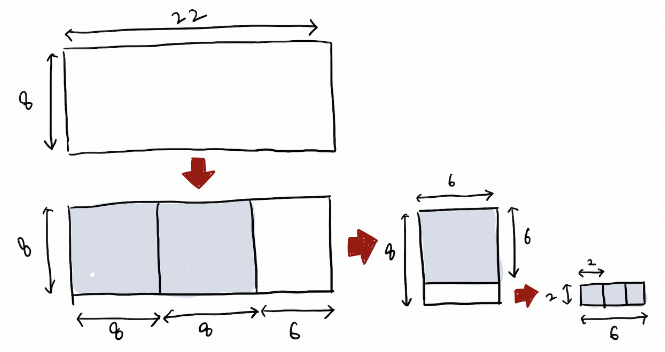

최대공약수 구하기(수학 ver.)
> 두 정수 $x, y$의 최대 공약수를 $gcd(x,y)$라 하자.
<br> $x = az$ 이고 $y=bz$ $(a, b \in Z)$ 일 때, 최대의 정수 $z = gcd(x,y)$

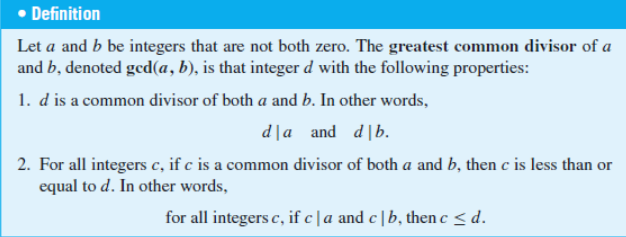

위를 바탕으로 알고리즘을 만들어보자.
* $y=0$ → $x$
* $y\neq0$ → $gcd(y, x$ % $y)$

이 알고리즘을 **유클리드 호제법(Euclidean algorithm)** 이라고 한다.

In [ ]:
# 실습 5-2
# 유클리드 호제법으로 최대 공약수 구하기

def gcd(x: int, y: int) -> int:
    """정숫값 x와 y의 최대 공약수를 반환"""
    if y == 0:
        return x
    else:
        return gcd(y, x % y)

if __name__ == '__main__':
    print('두 정숫값의 최대 공약수를 구합니다.')
    x = int(input('첫 번째 정숫값을 입력하세요.: '))
    y = int(input('두 번째 정숫값을 입력하세요.: '))

    print(f'두 정숫값의 최대 공약수는 {gcd(x, y)}입니다.')

두 정숫값의 최대 공약수를 구합니다.
첫 번째 정숫값을 입력하세요.: 22
두 번째 정숫값을 입력하세요.: 8
두 정숫값의 최대 공약수는 2입니다.


파이썬에서는 최대 공약수를 구하는 표준 라이브러리로 math 모듈에서 gcd() 함수를 제공한다.


In [ ]:
import math

a = int(input("첫번째 정수: "))
b = int(input("두번째 정수: "))
f = math.gcd(a,b)

print(f'두 정수의 최대 공약수는 {f}이다.')

첫번째 정수: 22
두번째 정수: 8
두 정수의 최대 공약수는 2이다.


Note
* gcd(0,n)=n
* gcd(0,0)=0

# 5.2 재귀 알고리즘 분석

## 재귀 알고리즘의 2가지 분석 방법

In [ ]:
# 실습 5-3
# 순수한 재귀 함수 구현하기

def recur(n: int) -> int:
    """순수한 재귀 함수 recur의 구현"""
    if n > 0:       # 양수 n에 대해서만 생각
        recur(n - 1)
        print(n)
        recur(n - 2)

x = int(input('정숫값을 입력하세요.: '))

recur(x)

정숫값을 입력하세요.: 4
1
2
3
1
4
1
2


위의 recur() 함수처럼 재귀 호출을 여러 번 실행하는 함수를 **순수한(genuinely) 재귀**라고 한다.

---

재귀 알고리즘을 분석하는 방법 2가지
1. 하향식 분석(top-down analysis)
<br> : 가장 위쪽에 위치한 상자의 함수 호출부터 시작하여 계단식으로 자세히 조사해 나가는 분석 방법
<br> 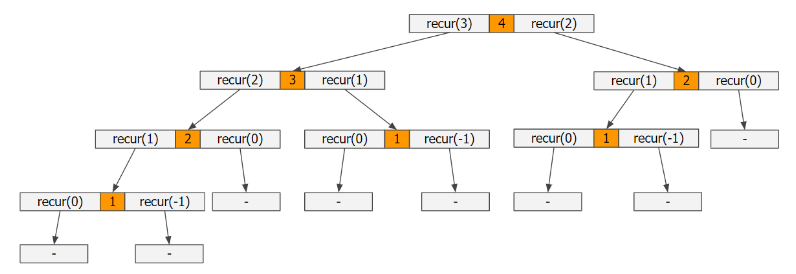

2. 상향식 분석(down-top analysis)
<br> : 하향식 분석의 반대로 아래쪽부터 쌓아 올리며 분석하는 방법
<br>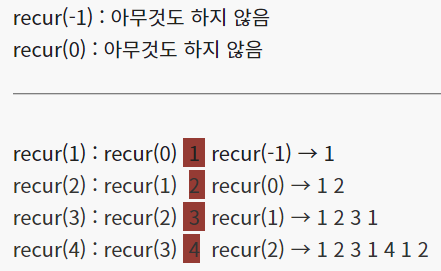


위의 recur() 함수로 예를 들면,
하향식 분석을 사용하면 크게 recur(4)-recur(3)-recur(2)-recur(1) 순으로 진행되고
<br> 상향식 분석을 사용하면 크게 recur(1)-recur(2)-recur(3)-recur(4) 순으로 진행된다.
<br> (중간중간에 추가되는 recur() 함수도 있음에 주의하자.)

※ 주로 우리는 하향식으로 분석하는 경우가 많은데, <br> 꼭대기부터 분석하면 같은 함수를 여러번 호출할 수 있으므로 하향식 방식이 반드시 효율적이라고 말할 수 없다.

In [ ]:
# 조금만 더!
# recur() 함수의 재귀 호출을 거꾸로 출력하기

def recur(n: int) -> int:
    """순수한 재귀 함수 recur의 구현(거꾸로 출력)"""
    if n > 0:
        recur(n - 2)
        print(n)
        recur(n - 1)

x = int(input('정숫값을 입력하세요.: '))

recur(x)

정숫값을 입력하세요.: 4
2
1
4
1
3
2
1


## 재귀 알고리즘의 비재귀적 표현

$Step$ $1$. 꼬리 재귀 제거하기

위에서 본 recur 함수의 꼬리 재귀 recur(n-2)는 '인수로 n-2의 값을 전달하고 recur() 함수를 호출' 한다는 의미를 갖는다.
<br> 그럼 그냥 재귀 함수를 사용하지말고 전달하는 인수의 값만 바꾸면 안될까?
<br> 아래의 코드를 보자.

In [ ]:
# 재귀 함수의 구현(꼬리 재귀를 제거)

def recur(n: int) -> int:
    """꼬리 재귀를 제거한 함수 recur"""
    while n > 0:
        recur(n - 1)
        print(n)
        n = n - 2
x = int(input('정수값을 입력하세요.: '))

recur(x)

정수값을 입력하세요.: 4
1
2
3
1
4
1
2


$Step$ $2$. 재귀 제거하기

맨 앞에서 재귀 호출을 하는 recur(n-1)은 꼬리 재귀처럼 쉽게 제거할 수 없다. 
<br> 현재 n의 값을 임시로 저장해야 한다는 문제가 있다.<br> recur(n-1)을 처리하고 print(n)을 할 때 임시로 저장했던 n을 꺼내 그 값을 출력해야한다.


이 문제는 4장에서 배웠던 stack을 사용하여 해결 할 수 있다.

In [ ]:
# stack 코드

from typing import Any
from collections import deque

class Stack:
    """고정 길이 스택 클래스(collections.deque를 사용)"""

    def __init__(self, maxlen: int = 256) -> None:
        """초기화 선언"""
        self.capacity = maxlen
        self.__stk = deque([], maxlen)

    def __len__(self) -> int:
        """스택에 쌓여있는 데이터 개수를 반환"""
        return len(self.__stk)

    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return not self.__stk

    def is_full(self) -> bool:
        """스택이 가득 찼는지 판단"""
        return len(self.__stk) == self.__stk.maxlen

    def push(self, value: Any) -> None:
        """스택에 value를 푸시"""
        self.__stk.append(value)

    def pop(self) -> Any:
        """스택에서 데이터를 팝"""
        return self.__stk.pop()

    def peek(self) -> Any:
        """스택에서 데이터를 피크"""
        return self.__stk[-1]

    def clear(self) -> None:
        """스택을 비웁니다"""
        self.__stk.clear()

    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스(없으면 -1)를 반환"""
        try:
            return self.__stk.index(value)
        except ValueError:
            return -1

    def count(self, value: Any) -> int:
        """스택에 포함된 value의 개수를 반환"""
        return self.__stk.count(value)

    def __contains__(self, value: Any) -> bool:
        """스택에 value가 포함되어 있는지 판단"""
        return self.count(value)

    def dump(self) -> int:
        """스택 안에 있는 모든 데이터를 나열"""
        print(list(self.__stk))

In [ ]:
# 실습 5-5
# 스택으로 재귀 함수 구현하기(재귀를 제거)

def recur(n: int) -> int:
    """재귀를 제거한 함수 recur"""
    s = Stack(n)      # 최대 n개 넣을 수 있는 stack 생성

    while True:
        if n > 0:             # 조건1
            s.push(n)         # n 값을 푸시
            n = n - 1
            continue
        if not s.is_empty():  # 조건2   # 스택이 비어 있지 않으면
            n = s.pop()       # 저장하고 있는 값을 팝하여 n에 대입
            print(n)
            n = n - 2
            continue
        break

x = int(input('정수값을 입력하세요.: '))

recur(x)

정수값을 입력하세요.: 4
1
2
3
1
4
1
2


# 5.3 하노이의 탑

* 하노이 탑
<br> : 작은 원반이 위에, 큰 원반이 아래에 위치하는 규칙을 지키면서 기둥 3개를 이용해서 원반을 옮기는 문제
<br> : 쌓아 놓은 원반을 최소 횟수로 옮기는 알고리즘

규칙
* 처음에는 크기가 모두 다른 원반이 첫번째 기둥에 쌓여 있는 상태로 시작한다.
* 이 상태에서 모든 원반을 크기순으로 세번째 기둥에 최소 횟수로 옮겨야한다.
* 원반은 한번에 1개씩만 옮길 수 있다.
* 큰 원반은 작은 원반 위에 쌓을 수 없다.

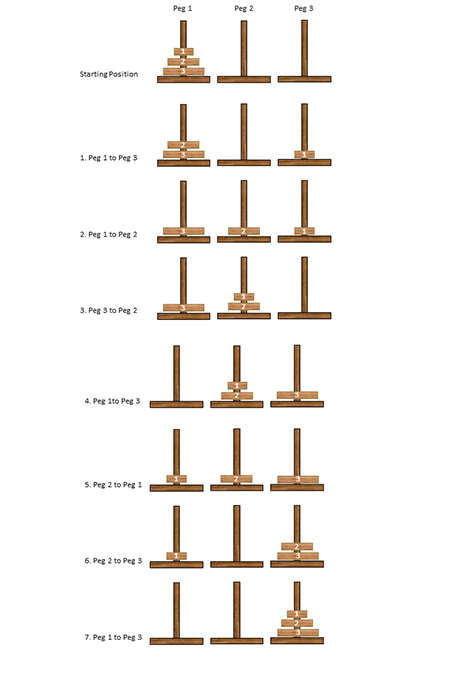

Tip (단계별로 생각하기)
> 1단계 : 가장 큰 원반을 뺀 다른 원반들을 중간 기둥으로 옮기기
<br> 2단계 : 가장 큰 원반을 목표 기둥으로 옮기기
<br> 3단계 : 중간 기둥으로 옮겼던 원반들 목표 기둥으로 옮기기

In [ ]:
# 실습 5-6
# 하노이의 탑 구현하기

def move(no: int, x: int, y: int) -> None:
    """원반을 no개를 x 기둥에서 y 기둥으로 옮김"""
    if no > 1:
        move(no - 1, x, 6 - x - y)

    print(f'원반 [{no}]을(를) {x}기둥에서 {y}기둥으로 옮깁니다.')

    if no > 1:
        move(no - 1, 6 - x - y, y)

print('하노이의 탑을 구현하는 프로그램입니다.')
n = int(input('원반의 개수를 입력하세요.: '))

move(n, 1, 3)

하노이의 탑을 구현하는 프로그램입니다.
원반의 개수를 입력하세요.: 3
원반 [1]을(를) 1기둥에서 3기둥으로 옮깁니다.
원반 [2]을(를) 1기둥에서 2기둥으로 옮깁니다.
원반 [1]을(를) 3기둥에서 2기둥으로 옮깁니다.
원반 [3]을(를) 1기둥에서 3기둥으로 옮깁니다.
원반 [1]을(를) 2기둥에서 1기둥으로 옮깁니다.
원반 [2]을(를) 2기둥에서 3기둥으로 옮깁니다.
원반 [1]을(를) 1기둥에서 3기둥으로 옮깁니다.


#5.4 8퀸 문제

## 8퀸 문제 알아보기

* 8퀸 문제(8-Queen problem)
<br> : 8개의 퀸이 서로 공격하여 잡을 수 없도록 8 x 8 체스판에 배치하시오.
<br> : 92개의 해결 방법이 존재

체스에서 퀸은 체스판의 가로, 세로, 대각선 어디든지 직선 이동해서 상대를 잡을 수 있다.

## 퀸 배치하기

퀸 8개를 배치하는 조합은 총 $_{64}P_{8}$
<br> 이 조합을 하나하나 확인하는 것은 비현실적이기 때문에 규칙을 생각하면서 가능한 조합의 수를 줄여보자.

[규칙 1. 각 열에 퀸을 1개만 배치한다.]

규칙1을 적용하면 퀸 8개를 배치하는 조합은 총 8 x 8 x 8 x 8 x 8 x 8 x 8 x 8으로 여전히 큰 수이다.

In [ ]:
# 실습 5-7
# 각 열에 1개 퀸을 배치한 조합을 재귀적으로 나열하기

pos = [0] * 8   # 0 8개로 만들어진 리스트 만들기
                # 각 열에서 퀸의 위치를 출력  # 행번호 출력

def put() -> None:
    """각 열에 배치한 퀸의 위치를 출력"""
    for i in range(8):
        print(f'{pos[i]:2}', end='')        # 리스트 안에 있는 원소 모두 나열
    print()

def set(i: int) -> None:
    """i 열에 퀸을 배치"""
    for j in range(8):
        pos[i] = j   # 퀸을 j행에 배치      # i: 열 번호, j: 행 번호
        if i == 7 :  # 모든 열에 배치를 종료
            put()       # 모든 열에 배치를 완료했으면, 나열
        else:
            set(i + 1)  # 다음 열에 퀸을 배치

set(0)  # 0 열에 퀸을 배치

###### 전부 다 print하는데 매우 오래 걸린다는 걸 알아두자 #######

위의 코드를 실행하면, $8^8$개의 조합이 나열된다.

* 분기 작업(branching)
<br> : 차례대로 가지가 뻗어 나가듯이 배치 조합을 열거하는 방법
* 분할 정복법(divide and conquer)
<br> : 큰 문제를 작은 문제로 분할하거나 작은 문제 풀이법을 결합하여 전체 풀이법을 얻는 방법

## 한정 작업과 분기 한정법

위의 분기 작업으로 퀸을 배치하는 조합을 나열할 수는 있지만 8퀸 문제의 최종 답을 얻을 수는 없다.

[규칙2. 각 행에 퀸을 1개만 배치한다.]

In [ ]:
# 실습 5-8
# 행과 열에 퀸을 1개 배치하는 조합을 재귀적으로 나열하기

pos = [0] * 8       # 각 열에서 퀸의 위치
flag = [False] * 8  # 각 행에 퀸을 배치했는지 체크

def put() -> None:
    """각 열에 놓은 퀸의 위치를 출력"""
    for i in range(4):
        print(f'{pos[i]:2}', end='')
    print()

def set(i: int) -> None:
    """i 열의 알맞은 위치에 퀸을 배치"""
    for j in range(4):
        if not flag[j]:  # j 행에 퀸을 배치하지 않았으면        # 같은 행에 중복하여 퀸을 배치하지 않기 위한 표시
            pos[i] = j   # 퀸을 j 행에 배치
            if i == 3:   # 모든 열에 퀸을 배치를 완료
                put()       # 배치 완료 했으면 나열
            else:
                flag[j] = True
                set(i + 1)          # 다음 열에 퀸을 배치
                flag[j] = False     # 초기화하기 위해서 사용

set(0)  # 0열에 퀸을 배치


 0 1 2 3
 0 1 3 2
 0 2 1 3
 0 2 3 1
 0 3 1 2
 0 3 2 1
 1 0 2 3
 1 0 3 2
 1 2 0 3
 1 2 3 0
 1 3 0 2
 1 3 2 0
 2 0 1 3
 2 0 3 1
 2 1 0 3
 2 1 3 0
 2 3 0 1
 2 3 1 0
 3 0 1 2
 3 0 2 1
 3 1 0 2
 3 1 2 0
 3 2 0 1
 3 2 1 0


* 한정 작업(bounding)
<br> : 필요하지 않은 분기를 없애서 불필요한 조합을 열거하지 않는 방법
* 분기 한정법(branching and bounding method)
<br> : 분기 작업과 한정 작업을 조합하여 문제를 풀이하는 방법

















## 8퀸 문제 해결 프로그램 만들기

퀸은 대각선으로도 움직일 수 있으므로, 어떤 대각선에서 보더라도 퀸을 1개만 배치하는 한정적인 작업을 추가로 적용해야한다.

In [ ]:
# 실습 5-9
# 8퀸 문제 알고리즘 구현하기

pos = [0] * 4          # 각 열에 배치한 퀸의 위치
flag_a = [False] * 4   # 각 행에 퀸을 배치했는지 체크
flag_b = [False] * 7  # 대각선 방향(↙↗)으로 퀸을 배치했는지 체크
flag_c = [False] * 7  # 대각선 방향( ↘↖)으로 퀸을 배치했는지 체크

def put() -> None:
    """각 열에 배치한 퀸의 위치를 출력"""
    for i in range(4):
        print(f'{pos[i]:2}', end='')
    print()

def set(i: int) -> None:
    """i 열의 알맞은 위치에 퀸을 배치"""
    for j in range(4):
        if(not flag_a[j]            # j행에 퀸이 배치 되지 않았다면
            and not flag_b[i + j]        # 대각선 방향(↙↗)으로 퀸이 배치 되지 않았다면
            and not flag_c[i - j + 3]):  # 대각선 방향( ↘↖)으로 퀸이 배치 되지 않았다면
            pos[i] = j  # 퀸을 j행에 배치
            if i == 3:  # 모든 열에 퀸을 배치하는 것을 완료
                put()
            else:
                flag_a[j] = flag_b[i + j] = flag_c[i - j + 3] = True        # j행에 퀸 배치 완료 했으니까
                set(i + 1)  # 다음 열에 퀸을 배치
                flag_a[j] = flag_b[i + j] = flag_c[i - j + 3] = False       # 초기화 할 때 사용

set(0)  # 0열에 퀸을 배치

 1 3 0 2
 2 0 3 1


실행 결과가 숫자만으로 이루어져 있기 때문에 좀 더 쉽게 알기 위해 □와 ■로 배치해보자.

In [ ]:
# 8퀸 문제 알고리즘 구현하기(퀸을 놓는 상황을 네모로 표시)

pos = [0] * 4          # 각 열에 배치한 퀸의 위치
flag_a = [False] * 4   # 각 행에 퀸을 배치했는지 체크
flag_b = [False] * 7  # 대각선 방향(↙↗)으로 퀸을 배치했는지 체크
flag_c = [False] * 7  # 대각선 방향( ↘↖)으로 퀸을 배치했는지 체크

def put() -> None:
    """퀸을 놓는 상황을 □와 ■로 출력"""
    for j in range(4):
        for i in range(4):
            print('■' if pos[i] == j else '□', end='')
        print()
    print()

def set(i: int) -> None:
    """i 열의 알맞은 위치에 퀸을 놓기"""
    for j in range(4):
        if(     not flag_a[j]           # j 행에 아직 퀸을 놓지 않았으면
            and not flag_b[i + j]       # 대각선 방향(↙↗)으로 퀸이 배치 되지 않았다면
            and not flag_c[i - j + 3]): # 대각선 방향( ↘↖)으로 퀸이 배치 되지 않았다면
            pos[i] = j          # 퀸을 j 행에 놓기
            if i == 3:          # 모든 열에 퀸을 배치하는 것을 완료
                put()
            else:
                flag_a[j] = flag_b[i + j] = flag_c[i - j + 3] = True        # 배치해줬으니까 True로 변경
                set(i + 1)      # 다음 열에 퀸을 놓기
                flag_a[j] = flag_b[i + j] = flag_c[i - j + 3] = False       # 초기화를 위해 사용

set(0)          # 0 열에 퀸을 놓기

□□■□
■□□□
□□□■
□■□□

□■□□
□□□■
■□□□
□□■□

